# Spatial filtering of a GTFS feed

## Original network layout

Original route network
Lowered zoom level to keep map size reasonable. (z = 8)


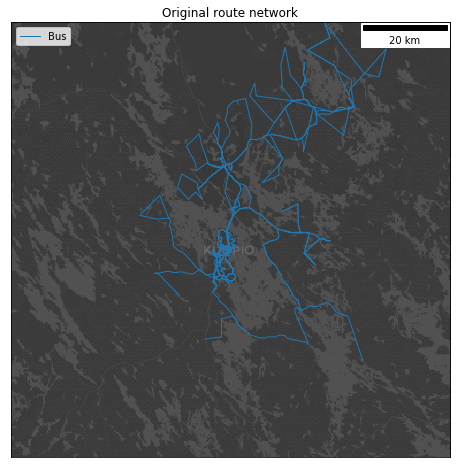

In [1]:
import sys
sys.path.append("../") # for using development version of gtfspy

import datetime
import os
from matplotlib import pyplot as plt

from example_import import load_or_import_example_gtfs
from gtfspy.gtfs import GTFS
from gtfspy.filter import FilterExtract
from gtfspy import mapviz

G = load_or_import_example_gtfs()
spatial_bounds = mapviz.get_median_centered_plot_bounds(G)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
mapviz.plot_route_network_from_gtfs(G, ax=ax, map_style="dark_all", spatial_bounds=spatial_bounds)
ax.set_title("Original route network")
plt.show()

## PT network routes after spatial filtering

filtering with lat: 62.8930796 lon: 27.6671316 buffer distance: 7
Updating travel times in trips table
Updating metadata


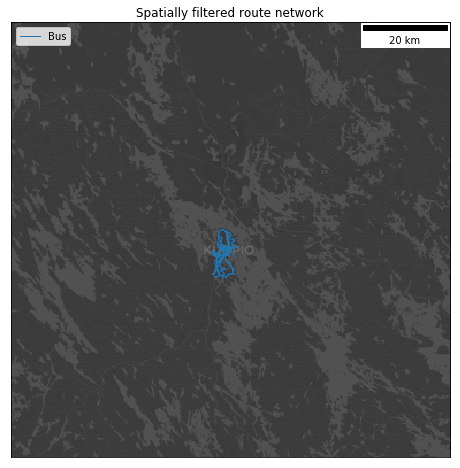

In [3]:
filtered_database_path = "test_db_kuopio.week.sqlite"
# remove the old file, if it exists
if os.path.exists(filtered_database_path):
    os.remove(filtered_database_path)

# filter by 7 kilometers from the city center
fe = FilterExtract(G, filtered_database_path, buffer_lat=62.8930796, buffer_lon=27.6671316, buffer_distance_km=7)
fe.create_filtered_copy()

G_filtered = GTFS(filtered_database_path)

# visualize the routes of the filtered database
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
mapviz.plot_route_network_from_gtfs(G_filtered, ax=ax, map_style="dark_all", spatial_bounds=spatial_bounds)
ax.set_title("Spatially filtered route network")
os.remove(filtered_database_path)
plt.show()